In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cnxn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=**CENSORED_HERE**;"
            "Database=enuygun;"
            "Trusted_Connection=yes;")
cnxn = pyodbc.connect(cnxn_str)

In [4]:
cursor = cnxn.cursor()


In [5]:
df_total = pd.read_sql("SELECT (CASE WHEN status_id = 0 then 'FAIL' WHEN status_id = 1 then 'SUCCESSFUL' else 'RETURN' end) as STATUS_,status_id,count(amount) TOTAL_SALES,sum(amount) TOTAL_AMOUNT FROM payment GROUP BY status_id",cnxn)

In [6]:
df_total['RATE'] = df_total['TOTAL_SALES']*100/df_total['TOTAL_SALES'].sum()

In [7]:
df_total

,STATUS_,status_id,TOTAL_SALES,TOTAL_AMOUNT,RATE
0,FAIL,0,45849,8318385,25.383248
1,SUCCESSFUL,1,119604,19670109,66.216014
2,RETURN,2,15174,2538336,8.400737


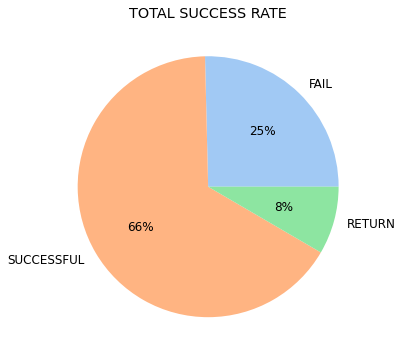

In [8]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
plt.title('TOTAL SUCCESS RATE')
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_total['RATE'], labels = df_total['STATUS_'], colors = colors, autopct='%.0f%%')
plt.show()

In [9]:
df_card_type = pd.read_sql("SELECT B.card_type,card_id,(CASE WHEN status_id = 0 then 'FAIL' WHEN status_id = 1 then 'SUCCESSFUL' else 'RETURN' end) as STATUS_,status_id,count(amount) TOTAL_SALES,sum(amount) TOTAL_AMOUNT FROM payment A LEFT JOIN card_types B ON A.card_id = B.id GROUP BY card_id,status_id,B.card_type",cnxn)

In [10]:
df_1 = df_card_type.groupby(['card_type','STATUS_']).agg({'TOTAL_SALES': 'sum'},as_index=False)
df_1 = df_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

In [11]:
df_1

,card_type,STATUS_,TOTAL_SALES
0,KrediKartı,FAIL,25.185127
1,KrediKartı,RETURN,8.276263
2,KrediKartı,SUCCESSFUL,66.538610
3,SaklıKart,FAIL,27.518748
4,SaklıKart,RETURN,9.742419
5,SaklıKart,SUCCESSFUL,62.738833


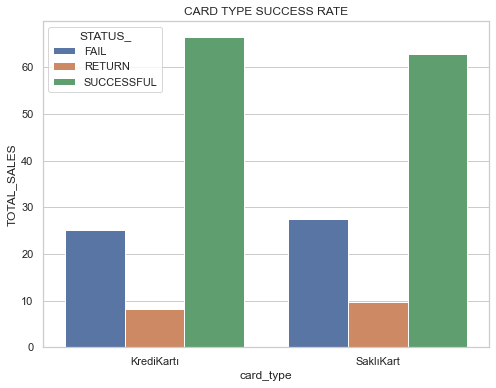

In [12]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
plt.title('CARD TYPE SUCCESS RATE')
xlocs, xlabs = plt.xticks()
colors = sns.color_palette('pastel')[0:5]
sns.barplot(x='card_type',y='TOTAL_SALES',hue='STATUS_',data=df_1)
plt.show()

In [13]:
df_environment = pd.read_sql("SELECT C.environment,(CASE WHEN status_id = 0 then 'FAIL' WHEN status_id = 1 then 'SUCCESSFUL' else 'RETURN' end) as STATUS_,status_id,count(amount) TOTAL_SALES,sum(amount) TOTAL_AMOUNT FROM payment A LEFT JOIN (select id,environment_id from booking_) B ON A.bookingID = B.id LEFT JOIN environment C ON B.environment_id = C.id GROUP BY environment_id,status_id,C.environment",cnxn)
df_2 = df_environment.groupby(['environment','STATUS_']).agg({'TOTAL_SALES': 'sum'})
df_2 = df_2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

In [14]:
df_2

,environment,STATUS_,TOTAL_SALES
0,app,FAIL,28.139269
1,app,RETURN,8.587588
2,app,SUCCESSFUL,63.273142
3,web,FAIL,22.231716
4,web,RETURN,8.187072
5,web,SUCCESSFUL,69.581212


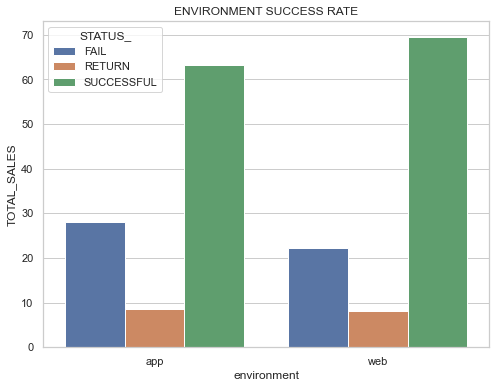

In [15]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
plt.title('ENVIRONMENT SUCCESS RATE')
xlocs, xlabs = plt.xticks()
colors = sns.color_palette('pastel')[0:5]
sns.barplot(x='environment',y='TOTAL_SALES',hue='STATUS_',data=df_2)
plt.show()

In [16]:
df_company = pd.read_sql("SELECT B.company,(CASE WHEN status_id = 0 then 'FAIL' WHEN status_id = 1 then 'SUCCESSFUL' else 'RETURN' end) as STATUS_,status_id,count(amount) TOTAL_SALES,sum(amount) TOTAL_AMOUNT FROM payment A LEFT JOIN (select id,company from booking_) B ON A.bookingID = B.id GROUP BY B.company,status_id",cnxn)
df_company = df_company.groupby(['company','STATUS_']).agg({'TOTAL_SALES': 'sum'})
df_3 = df_company.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
df_3

,company,STATUS_,TOTAL_SALES
0,AA,FAIL,34.503765
1,AA,RETURN,0.003422
2,AA,SUCCESSFUL,65.492813
3,BB,FAIL,23.861699
4,BB,RETURN,10.638281
5,BB,SUCCESSFUL,65.500020
6,CC,FAIL,21.447986
7,CC,RETURN,6.340499
8,CC,SUCCESSFUL,72.211515
9,DD,FAIL,22.797651


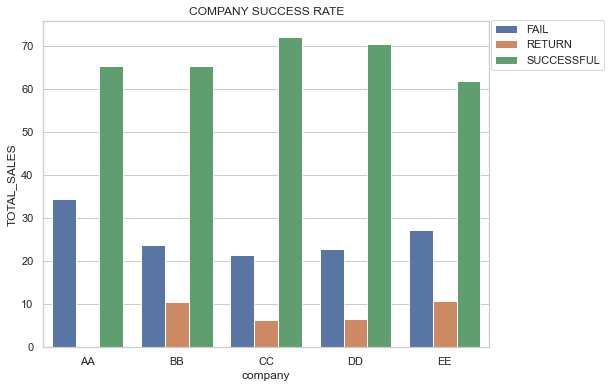

In [17]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")
plt.title('COMPANY SUCCESS RATE')
colors = sns.color_palette('pastel')[0:5]
sns.barplot(x='company',y='TOTAL_SALES',hue='STATUS_',data=df_3)
plt.legend(bbox_to_anchor =(1.27, 1.02))
plt.show()